# Métodos Numéricos 

## Guía 1

### Problema 1

Escribir símbolos especiales en Julia es muy parecido a escribir símbolos especiales en LaTeX. Para ello, se utiliza el sistema unicode 

https://docs.julialang.org/en/v1/manual/unicode-input/

Por ejemplo, para escribir:

In [1]:
"÷"     # tiene que escribir \div y luego presionar la tecla tab.

"α"     # tiene que escribir \alpha y luego presionar la tecla tab.

"⊗"     # tiene que escribir \otimes y luego presionar la tecla tab.

"⊗"

En una celda de código, escriba entre comillas los símbolos $\pm$, $\times$, $\Delta$, $\epsilon$, $\backepsilon$, $\leq$, $\subseteq$  y $x^3$

In [2]:
print("± × Δ ϵ ϶ ≤ ⊆ x³")
println("±")
println("×")
println("Δ")
println("ϵ")
println("϶")
println("≤")
println("⊆")
println("x³")

± × Δ ϵ ϶ ≤ ⊆ x³±
×
Δ
ϵ
϶
≤
⊆
x³


### Problema 2

Evaluar las siguientes operaciones matemáticas, una por celda. Tenga en cuenta que, en Julia, la división entera se representa por el símbolo ÷.

    A = 5 ÷ 2 + 20 ÷ 6
    B = 4 * 6 ÷ 2 - 15 ÷ 2
    C = 5 * 15 ÷ 2 ÷ (4 - 2)
    D = 1 + 1 ÷ 4
    E = 1. + 1 ÷ 4
    F = 1 + 1. / 4
    G = 1. + 1. / 4.

In [3]:
println("A = ", 5 ÷ 2 + 20 ÷ 6)
println("B = ", 4 * 6 ÷ 2 - 15 ÷ 2)
println("C = ", 5 * 15 ÷ 2 ÷ (4 - 2))
println("D = ", 1 + 1 ÷ 4)
println("E = ", 1. + 1 ÷ 4)
println("F = ", 1 + 1. /4)
println("G = ", 1. + 1. / 4.)

A = 5
B = 5
C = 18
D = 1
E = 1.0


F = 1.25
G = 1.25


### Problema 3

Implemente una función que pida dos numeros reales e imprima en la pantalla el mayor de ellos. 
La función debe indicar si los numeros son iguales.
Testee la función con ejemplos.

In [4]:
function bigger(x, y)
    if x > y
        return x
    elseif y > x
        return y
    else
        return "They are equal"
    end
end

println(bigger(1000, 1000))

They are equal



### Problema 4

Implemente una función que pida un número entero y retorne un booleano determinando si es multiplo de 2 y de 5. Testee la función con ejemplos.




In [5]:
function multiploDe2y5(x)
    return x % 2 == 0 && x % 5 == 0
end

println(multiploDe2y5(16))

false


### Problema 5

Implemente una función que pida los coeficientes $A$, $B$ y $C$ de un polinomio real de segundo grado ($A x^2 + B x + C$), calcule e imprima en pantalla las dos raíces del polinomio en formato complejo $a + i b$, sin
utilizar algebra compleja.
Testee la función con ejemplos.

In [14]:
function RaicesPolinomioDe2doGrado(A, B, C)
    dif = B^2-4*A*C
    res = ""
    if dif < 0
        res = String(string(-B / (2*A))) * " + i" * String(string(sqrt(-dif) / (2*A)))
    elseif dif == 0
        res = String(string(-B / (2*A)))
    else
        res = String(string((-B + sqrt(dif)) / (2*A))) * " && " * String(string((-B - sqrt(dif)) / (2*A)))
    end
    return res
end

println(RaicesPolinomioDe2doGrado(1, -6, 5))
println(RaicesPolinomioDe2doGrado(3,2,2))

5.0 && 1.0
-0.3333333333333333 + i0.7453559924999299


### Problema 6

Implemente una función que compute la suma (en precisión simple, i.e. 32 bits)
$$
\sum_{n=1}^{10\,000\,000} \frac{1}{n}
$$
en el orden usual.
Luego, implemente otra que compute la suma en el orden opuesto.
Ejecute ambas funciones, observe los resultados y describa las diferencias obtenidas.
En particular, indique cuál función es más precisa y explique porqué.

In [19]:
function sumatoria1OverNReverse(n::Integer)
    if n == 0
        return 0
    else
        return Float32(1 / n) + sumatoria1OverN(n - 1)
    end
end

function sumatoria1OverN(k::Integer)
    n = 1::Integer
    sum = 0
    while n != k
        sum = sum + Float32(1 / n)
        n = n + 1
    end
    return sum
end


println(sumatoria1OverN(10000000))
println(sumatoria1OverNReverse(10000000))

15.403683
15.403683


### Problema 7

Escriba un programa que calcule la posición y la velocidad en función del tiempo para un problema de tiro oblicuo.
El programa debe tomar como datos de entrada el ángulo $\theta$ (en grados) y la rapidez inicial $v_0$ (en m/seg.), asumiendo que el proyectil parte del origen.
Elija el incremento temporal ($\Delta t$) de manera que eventualmente pueda graficar una trajectoria con 600 puntos en el intervalo entre el disparo y el instante en que el proyectil vuelve a tener altura 0. 
El programa debe utilizar una función para calcular la posición y la velocidad.
Calcule la trayectoria para $\theta=°30$ y $v_0=50\, m/s$.
En una figura grafique $x(t)$, $y(t)$ y $v_y(t)$ en función de $t$.
En otra figura grafique la trayectoria del proyectil.

**Ayuda:** para plotear puntos o curvas, lea [https://docs.juliaplots.org/latest/tutorial/](https://docs.juliaplots.org/latest/tutorial/). Además, aquí le damos un ejemplo.

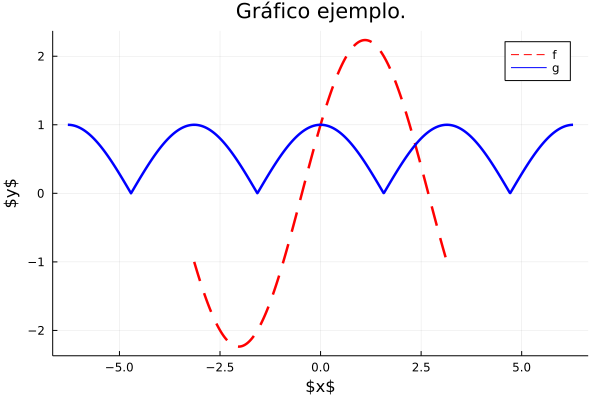

In [20]:
# importamos el paquete Plots.
using Plots
using LaTeXStrings # Esto sirve para incorporar LaTeX al gráfico (ej. en ejes, leyendas, etc.).
# Definimos un rango de valores que comienza en -π, va de a pasos 0.01 y termina en π.
x = -π:0.01:π
# Definimos la función que queremos plotear en dicho rango
f(x) = cos(x) + 2.0*sin(x)
# Usando broadcasting (i.e. poniendo un punto detras del nombre de la función), aplicamos la función "f"
# al rango previamente definido "x" para crear un vector "y".
y = f.(x)
# Ploteamos los valores de y vs x, usando una linea punteada de color rojo, ancho 2.5 y leyenda "f".
plot(x,y,linestyle=:dash,linecolor=:red,linewidth=2.5,label="f")
# Agregamos al plot (por eso usamos plot! en vez de plot) título y nombres a los ejes.
plot!(xlabel=L"x",ylabel=L"y",title="Gráfico ejemplo.")
# Definimos otra curva
x = -2π:0.01:2π
g(x) = abs(cos(x))
y = g.(x)
# y la agregamos al gráfico.
plot!(x,y,linestyle=:solid,linecolor=:blue,linewidth=2.5,label="g")

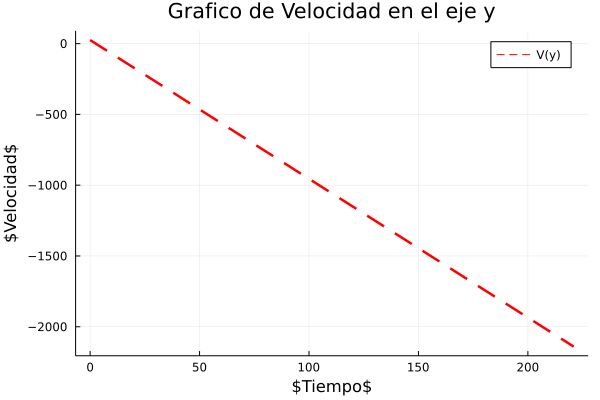

In [44]:
function tiroOblicuo(α, v)
    g = 9.8
    Vy = v * sin(α)
    Vx = v * cos(α)
    tf = (Vy / g)*2
    t = 0:(Vx*tf / 600):Vx*tf
    vely(x) = Vy - g*x
    velx(x) = Vx
    y = vely.(t)
    x = velx.(t)
    plot(t,y,linestyle=:dash,linecolor=:red,linewidth=2.5,label="V(y)")
    plot!(xlabel=L"Tiempo",ylabel=L"Velocidad",title="Grafico de Velocidad en el eje y")
end

tiroOblicuo(π/6, 50)

    



0.8939966636005579

### Problema 8

Implemente una función que multiplique un vector $v$ de dimensión $N$ por una matriz $A$ de dimensión $N\times N$, y retorne como resultado un vector de dimensión $N$.

Escriba un programa que, dado el valor de $N$:

1. cree los arreglos correspondientes para $v$ y $A$,

2. inicie los valores de $A$ de modo que sea triangular superior, con todos sus elementos igual a 1, excepto los de la diagonal que deben tomar valor 3,

3. inicie el vector con todos elementos pares igual a 2, y los impares igual a 3. 

Minimice el uso de loops (i.e. `for`) para las inicializar los valores del vector y de la matriz. Utilice, en cambio, *broadcasting* y *slicing*.

**Ayuda:** Lea [https://docs.julialang.org/en/v1/base/arrays/](https://docs.julialang.org/en/v1/base/arrays/).

In [ ]:
function 

### Problema 9

Escriba una funcion que tome como entrada un número natural $n$ en base $10$ y un número natural $b \in \{2,3,...,16\}$ también en base $10$, y que retorne un string representando a $n$ en base $b$. Testee la función con ejemplos. Chequee con [https://www.rapidtables.com/convert/number/base-converter.html](https://www.rapidtables.com/convert/number/base-converter.html).

In [ ]:
function baseChange(n, Base)
    

## Ejercicios Complementarios


### Problema C.1

Efectúe con un programa en Julia en simple precisión los siguientes cálculos matemáticamente equivalentes,

a) $1\,000\,000 \times 0.1$

b) $\sum_{n=1}^{1\,000\,000} 0.1$

c) $\sum_{n=1}^{1\,000} \left( \sum_{m=1}^{1\,000} 0.1\right)$

Explique las diferencias obtenidas entre resultados finales de a), b) y c) y muestre que el error relativo en b) es del orden del $1\%$, pero es mucho menor en c). 

1. En los puntos b) y c), vaya guardando en un vector los errores parciales obtenidos para diferentes valores de $n$ entre 1 y 1,000,000. 
Cada 1000 iteraciones en el caso b), y en todas las iteraciones de la suma externa en c), de maner que cada suma parcial comprenda 1000 términos de la suma total.

2. Grafique dichos vectores, comparando con el valor exacto $0.1\times n$ de la correspondiente suma parcial a cada valor de $n$.
Incluya en el gráfico nombres adecuados en los ejes y con leyendas adecuadas.
Los datos de b) graficarlos con puntos de tamaño 0.75 (el default es 1), y los de c) con línea
de grosor 1.6 (el default es también 1). 

3. Luego de ver cómo le queda la gráfica en escala lineal, vuelva a graficar con el eje $x$ en escala logarítmica. 
Segun su criterio, en qué escala se aprecia mejor el resultado del problema para su análisis? 
Puede al eje $y$ darle escala logarítmica? 
Pruebe qué pasa si lo hace.
Analice la conveniencia en general del uso de escalas logarítmicas.

Resalte la conclusión de este ejercicio.

### Problema C.2

Baje el archivo `GlobalTemperatures.csv` de Kaggle:

[https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/version/2?select=GlobalTemperatures.csv](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/version/2?select=GlobalTemperatures.csv)

Este archivo contiene la temperatura (promediada sobre el globo terrestre y a lo largo del día) de cada día (salvo algunos faltantes) desde 1 de Enero de 1750 hasta el año 2015.

Escribir un programa que lea la tabla de números y grafique las columna `LandAverageTemperature` vs el número de fila, incluyendo una leyenda adecuada y títulos a los ejes. Finalmente, incluya una linea constante en la temperatura promedio. Tengan en cuenta que en los datos existen valores faltantes (missing values). 

Repita lo anterior, pero agregando a la figura una curva representando el *rolling average* de los datos usando una ventana de $v=365$ días. El rolling average se define como

$$x_{ra}(t,v) = \frac{1}{v}\sum_{t'=t}^{t+v} x(t')$$

i.e., para cada $t$, se promedian los valores de $x$ en $[t,t+v]$. Esto se usa para suavizar las fluctuaciones temporalmente locales de la señal.

Saque ventaja de los paquetes `CSV`, `DataFrames` y `Statistics`.

Puede concluirse que se observa calentamiento global?

### Problema C.3

Escribir un programa que, dado un año y el nombre de un mes, saque por pantalla el numero de días del mes.
Tenga en cuenta que algunos años son bisiestos.

**Ayuda:** Considere las siguientes afirmaciones. El año $a$ es:

1. divisible por 4,

2. divisible por 400.

3. divisible por 100,

Un año es bisiesto si: 

    1. & ( 2. or ( not 3. ) )
    
es verdadero. Fuente [https://es.wikipedia.org/wiki/A%C3%B1o_bisiesto](https://es.wikipedia.org/wiki/A%C3%B1o_bisiesto).

### Problema C.4

Escriba un programa para calcular un valor aproximado de $\pi$ utilizando 

1. La fórmula recurrente de Arquímedes, que  acota $\pi$ entre $P_n$ y $p_n$, con $p_n < \pi < P_n$. 
Siendo $p_n$ y $P_n$ los perímetros de los polígonos regulares de $n$ lados inscriptos y circunscriptos, respectivamente, en la circunsferencia de radio $1/2$. 

La fórmula de recurrencia que encontró Arquímides es la siguiente:

$$
\begin{align}
P_{2n} &= \frac{2 p_n P_n}{p_n + P_n} \\
p_{2n} &= \sqrt{P_{2n} p_n} 
\end{align}
$$


Usando los valores $P_6=2\sqrt{3}$ y $p_6 = 3$, correspondientes al hexágono, 
escriba un programa que realice 20 iteraciones, con $n = 6\times 2^k$, y 
$k=1, \cdots, 20$, y escriba los resultados en pantalla.

2. La productoria de Wallis
$$
\frac{\pi}{2} = \prod_{n=1}^\infty \frac{(2n)^2}{(2n)^2-1} =
\frac43\frac{16}{15}\frac{36}{35}\frac{64}{63}\dots 
%\frac21\frac23\frac43\frac45\frac65\frac67\dots 
$$
truncando la productoria a $10^6$ factores.

### Problema C.5

Ejecute el siguiente programa y explique por qué los valores obtenidos no son iguales.

In [ ]:
sum0 = Float32(0.0)
sum1 = Float32(1.0)
for i in 1:10000
    sum0 += Float32(1.e-8)
    sum1 += Float32(1.e-8)
end
sum0 += Float32(1.0)
println("sum0 = ",sum0)
println("sum1 = ",sum1)

### Ejercicio C.6

**Creando un paquete de Julia**

Importamos el administrador de paquetes.

In [ ]:
using Pkg

Creamos un macro que nos permita ejecutar comandos de cónsola (Linux en este ejemplo, pero Uds. puede remplazarlos por comandos equivalentes de Windows).

In [ ]:
macro bash_str(s) open(`bash`,"w",stdout) do io; print(io, s); end; end;

Probemos el macro, ingresando el comando de bash `ls` que comunmente se usa para listar el contenido de la carpeta en la que estamos trabajando.

In [ ]:
@bash_str "ls"

En esta carpeta, generaremos nuestro primer paquete, al que llamaremos `MiPackage`.

In [ ]:
Pkg.generate("MiPackage")

Listando el contenido de la carpeta actual, deberiamos poder ver una carpeta nueva llamada `MiPackage` que contiene el paquete generado.

In [ ]:
@bash_str "ls"

Listamos el contenido de la carpeta `MiPackage`. Deberiamos ver el archivo `Project.toml` que declara los atributos del paquete que creamos y la carpeta `src` que está destianada a contener los módulos del paquete.

In [ ]:
@bash_str "ls MiPackage"

Listamos el contenido de la carpeta `MiPackage/src`. Deberiamos ver el archivo `MiPackage.jl` que es un módulo creado por defecto al crearse el paquete.

In [ ]:
@bash_str "ls MiPackage/src"

Inspeccionamos el contenido del archivo `MiPackage/src/MiPackage.jl`. Deberíamos ver:

    module MiPackage

    greet() = print("Hello World!")

    end # module

In [ ]:
@bash_str "cat MiPackage/src/MiPackage.jl"

Ahora nos interesa agregar dependencias al paquete creado `MiPackage`, de manera que cuando instalemos/usemos `MiPackage` se instalen/importen automaticamente otros paquetes que deseemos.

Para ello, activamos el paquete `MiPackage`,

In [ ]:
Pkg.activate("MiPackage")

e instalamos el paquete `Random`

In [ ]:
Pkg.add("Random")

Como `MiPackage` está activo, `Random` se instalará como dependencia de `MiPackage`. Para corroborar esto, inspeccionamos la carpeta `MiPackage`

In [ ]:
@bash_str "ls MiPackage"

Deberíamos encontrar un nuevo archivo llamado `Manifest.toml`. En este archivo se declaran las dependencias de `MiPackage`. Para ver esto, lo inspeccionamos

In [ ]:
@bash_str "cat MiPackage/Manifest.toml"

In [ ]:
Ahora nos interesa agregar una función al módulo `MiPackage/src/MiPackage.jl`. Para ello sobreescribimos el correspondiente archivo haciendo

In [ ]:
s="""module MiPackage

export prn_rnd

import Random

greet() = print("Hello World!")
prn_rnd() = println("A continuación se imprimen 8 letras elegidas al azar: ",Random.randstring(8))

end # module"""

open("MiPackage/src/MiPackage.jl", "w") do io
    write(io,s)
end;

Chequeamos que todo haya salido bien

In [ ]:
@bash_str "cat MiPackage/src/MiPackage.jl"

Ahora usamos el paquete `MiPackage` y testeamos que la nueva función exportada `prn_rnd()` (la cual utiliza la dependencia instalada `Random`) funciona al llamarla.

In [ ]:
using MiPackage

In [ ]:
MiPackage.prn_rnd()

In [ ]:
prn_rnd()